In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import time
import datetime
import plotly  
import plotly.express as px
from datetime import datetime
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [3]:
data = pd.read_csv(r'/Users/xuzhejia/Desktop/商務數據/模型使用表格.csv')
data = data.iloc[:,1:]
data

,date,sum_by_month,income_average,舀除,Unnamed: 5,oil price,steel price,import,export,trafice_index,...,疫情,time,last_month,alert_3,疫情標準化,oil price standard,steel price standard,income average standard,trafic index standard,gdp_growth standard
0,2012M03,27390,133393,14,90.68,123.15,24000,27194522,8342402,107.07,...,0,2012/3/1,27390,0,-0.157423,2.040468,0.611379,-1.668303,0.954616,-1.122633
1,2012M04,23581,130318,14,90.93,119.04,24500,30225862,7773734,109.17,...,0,2012/4/1,27390,0,-0.157423,1.879700,0.802280,-1.836515,1.541531,-1.148868
2,2012M05,23769,130318,15,91.01,101.75,24500,27769174,8115286,108.16,...,0,2012/5/1,23581,0,-0.157423,1.203377,0.802280,-1.836515,1.259253,-1.148868
3,2012M06,24943,130318,15,91.00,96.13,24500,26508428,7578136,106.96,...,0,2012/6/1,23769,0,-0.157423,0.983543,0.802280,-1.836515,0.923872,-1.148868
4,2012M07,34893,136296,16,90.96,105.35,23000,30329134,7922212,107.33,...,0,2012/7/1,24943,0,-0.157423,1.344196,0.229577,-1.509501,1.027281,-0.550710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2021M07,31043,197066,38,131.26,77.71,28979,27159984,8576030,105.50,...,835,2021/7/1,19434,1,0.772693,0.263019,2.512370,1.814795,0.515826,0.598382
113,2021M08,27797,197066,39,132.68,73.62,28979,27475010,7928856,105.30,...,313,2021/8/1,31043,1,0.191231,0.103033,2.512370,1.814795,0.459930,0.598382
114,2021M09,33612,197066,38,134.10,77.80,28979,26461888,7506336,105.42,...,233,2021/9/1,27797,1,0.102118,0.266540,2.512370,1.814795,0.493468,0.598382
115,2021M10,28539,214296,39,135.41,83.39,30479,26865068,8118102,106.26,...,183,2021/10/1,33612,1,0.046423,0.485200,3.085073,2.757327,0.728234,0.855484


In [4]:
data['dif'] = data['sum_by_month'].diff()
data

,date,sum_by_month,income_average,舀除,Unnamed: 5,oil price,steel price,import,export,trafice_index,...,time,last_month,alert_3,疫情標準化,oil price standard,steel price standard,income average standard,trafic index standard,gdp_growth standard,dif
0,2012M03,27390,133393,14,90.68,123.15,24000,27194522,8342402,107.07,...,2012/3/1,27390,0,-0.157423,2.040468,0.611379,-1.668303,0.954616,-1.122633,NaN
1,2012M04,23581,130318,14,90.93,119.04,24500,30225862,7773734,109.17,...,2012/4/1,27390,0,-0.157423,1.879700,0.802280,-1.836515,1.541531,-1.148868,-3809.0
2,2012M05,23769,130318,15,91.01,101.75,24500,27769174,8115286,108.16,...,2012/5/1,23581,0,-0.157423,1.203377,0.802280,-1.836515,1.259253,-1.148868,188.0
3,2012M06,24943,130318,15,91.00,96.13,24500,26508428,7578136,106.96,...,2012/6/1,23769,0,-0.157423,0.983543,0.802280,-1.836515,0.923872,-1.148868,1174.0
4,2012M07,34893,136296,16,90.96,105.35,23000,30329134,7922212,107.33,...,2012/7/1,24943,0,-0.157423,1.344196,0.229577,-1.509501,1.027281,-0.550710,9950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2021M07,31043,197066,38,131.26,77.71,28979,27159984,8576030,105.50,...,2021/7/1,19434,1,0.772693,0.263019,2.512370,1.814795,0.515826,0.598382,11609.0
113,2021M08,27797,197066,39,132.68,73.62,28979,27475010,7928856,105.30,...,2021/8/1,31043,1,0.191231,0.103033,2.512370,1.814795,0.459930,0.598382,-3246.0
114,2021M09,33612,197066,38,134.10,77.80,28979,26461888,7506336,105.42,...,2021/9/1,27797,1,0.102118,0.266540,2.512370,1.814795,0.493468,0.598382,5815.0
115,2021M10,28539,214296,39,135.41,83.39,30479,26865068,8118102,106.26,...,2021/10/1,33612,1,0.046423,0.485200,3.085073,2.757327,0.728234,0.855484,-5073.0


In [5]:
data = data.iloc[1:,:]
data

,date,sum_by_month,income_average,舀除,Unnamed: 5,oil price,steel price,import,export,trafice_index,...,time,last_month,alert_3,疫情標準化,oil price standard,steel price standard,income average standard,trafic index standard,gdp_growth standard,dif
1,2012M04,23581,130318,14,90.93,119.04,24500,30225862,7773734,109.17,...,2012/4/1,27390,0,-0.157423,1.879700,0.802280,-1.836515,1.541531,-1.148868,-3809.0
2,2012M05,23769,130318,15,91.01,101.75,24500,27769174,8115286,108.16,...,2012/5/1,23581,0,-0.157423,1.203377,0.802280,-1.836515,1.259253,-1.148868,188.0
3,2012M06,24943,130318,15,91.00,96.13,24500,26508428,7578136,106.96,...,2012/6/1,23769,0,-0.157423,0.983543,0.802280,-1.836515,0.923872,-1.148868,1174.0
4,2012M07,34893,136296,16,90.96,105.35,23000,30329134,7922212,107.33,...,2012/7/1,24943,0,-0.157423,1.344196,0.229577,-1.509501,1.027281,-0.550710,9950.0
5,2012M08,23374,136296,15,90.97,114.47,23000,27271908,7485408,109.12,...,2012/8/1,34893,0,-0.157423,1.700938,0.229577,-1.509501,1.527557,-0.550710,-11519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2021M07,31043,197066,38,131.26,77.71,28979,27159984,8576030,105.50,...,2021/7/1,19434,1,0.772693,0.263019,2.512370,1.814795,0.515826,0.598382,11609.0
113,2021M08,27797,197066,39,132.68,73.62,28979,27475010,7928856,105.30,...,2021/8/1,31043,1,0.191231,0.103033,2.512370,1.814795,0.459930,0.598382,-3246.0
114,2021M09,33612,197066,38,134.10,77.80,28979,26461888,7506336,105.42,...,2021/9/1,27797,1,0.102118,0.266540,2.512370,1.814795,0.493468,0.598382,5815.0
115,2021M10,28539,214296,39,135.41,83.39,30479,26865068,8118102,106.26,...,2021/10/1,33612,1,0.046423,0.485200,3.085073,2.757327,0.728234,0.855484,-5073.0


In [6]:
w = [0]
w.extend(list(data['疫情'].shift(1)[1:]))
data['疫情last_month'] = w

/var/folders/_0/d81h2sdj5z1b6t7hh803swth0000gn/T/ipykernel_1037/1967009084.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
w = [-1.66830339591676]
w.extend(list(data['income average standard'].shift(1)[1:]))
data['income average last_month'] = w

/var/folders/_0/d81h2sdj5z1b6t7hh803swth0000gn/T/ipykernel_1037/2847042937.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [8]:
w = [-1.12263279793239]
w.extend(list(data['gdp_growth standard'].shift(1)[1:]))
data['gdp_growth standard last_month'] = w

/var/folders/_0/d81h2sdj5z1b6t7hh803swth0000gn/T/ipykernel_1037/3126221084.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
w = [2.04046807311964]
w.extend(list(data['oil price standard'].shift(1)[1:]))
data['oil price standard last_month'] = w

/var/folders/_0/d81h2sdj5z1b6t7hh803swth0000gn/T/ipykernel_1037/1605849105.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
w = [0.954615508614285]
w.extend(list(data['oil price standard'].shift(1)[1:]))
data['trafic index standard last_month'] = w

/var/folders/_0/d81h2sdj5z1b6t7hh803swth0000gn/T/ipykernel_1037/4031766162.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
auto_arima(data['dif'],seasonal=True,m = 6).summary() #12

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  116
Model:             SARIMAX(4, 0, 0)x(2, 0, 0, 6)   Log Likelihood               -1137.481
Date:                           Wed, 20 Apr 2022   AIC                           2288.961
Time:                                   13:32:43   BIC                           2308.236
Sample:                                        0   HQIC                          2296.786
                                           - 116                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7649      0.111     -6.876      0.000      -0.983      -0.547
ar.L2         -0.6158      0.147     -4.194      0.000      -0.903      -0.328
ar.L3         -0.4514      0.131     -3.432      0.001      -0.709      -0.194
ar.L4         -0.3400      0.080     -4.261      0.000      -0.496      -0.184
ar.S.L6        0.3299      0.101      3.278      0.001       0.133       0.527
ar.S.L12       0.4936      0.107      4.631      0.000       0.285       0.702
sigma2      1.805e+07   3.12e-09   5.78e+15      0.000     1.8e+07     1.8e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                16.81
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -0.63
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.77e+30. Standard errors may be unstable.
"""

In [33]:
#模型 (0,1,1),(1,0,1),12   #best(5,1,1),(1,1,1,12) "n" # 5,1,1 6,1,4,12 'n'  # 5,1,1,6,1,4,6 'n'
s = SARIMAX(
            data['sum_by_month'][:70].astype(int).values,
            order = (5,1,3),
            seasonal_order=(6,1,6,12),
            exog = data.loc[:70,[
                                 'oil price standard last_month',
                                 'last_month',
                                 'gdp_growth standard last_month',
                                 '疫情',
                                 'income average last_month',
                                 'trafic index standard last_month']],
            trend = 'n',
            time_varying_regression=True,
            mle_regression=False,
            measurement_error = True
           )

In [34]:
result = s.fit()
result.summary()

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           28     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32901D+00    |proj g|=  6.65612D-01


 This problem is unconstrained.



At iterate    5    f=  7.19322D+00    |proj g|=  3.70871D-02

At iterate   10    f=  7.14626D+00    |proj g|=  2.04050D-01

At iterate   15    f=  7.11223D+00    |proj g|=  6.84932D-02

At iterate   20    f=  7.08912D+00    |proj g|=  5.29266D-02

At iterate   25    f=  7.08441D+00    |proj g|=  1.35977D-02

At iterate   30    f=  7.08267D+00    |proj g|=  1.76671D-02

At iterate   35    f=  7.07974D+00    |proj g|=  1.02803D-01

At iterate   40    f=  7.07858D+00    |proj g|=  1.26444D-02

At iterate   45    f=  7.07609D+00    |proj g|=  3.66561D-02

At iterate   50    f=  7.07187D+00    |proj g|=  4.45649D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                              SARIMAX Results                                              
===========================================================================================================
Dep. Variable:                                                   y   No. Observations:                   70
Model:             SARIMAX(5, 1, 3)x(6, 1, [1, 2, 3, 4, 5, 6], 12)   Log Likelihood                -495.031
Date:                                             Wed, 20 Apr 2022   AIC                           1046.062
Time:                                                     13:34:41   BIC                           1100.153
Sample:                                                          0   HQIC                          1066.732
                                                              - 70                                         
Covariance Type:                                               opg                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
ar.L1                                    0.4628      2.066      0.224      0.823      -3.586       4.512
ar.L2                                   -0.3328      0.727     -0.458      0.647      -1.757       1.092
ar.L3                                    0.2643      1.058      0.250      0.803      -1.810       2.338
ar.L4                                   -0.4689      0.922     -0.508      0.611      -2.277       1.339
ar.L5                                    0.4843      1.015      0.477      0.633      -1.504       2.473
ma.L1                                   -0.3019      1.289     -0.234      0.815      -2.828       2.224
ma.L2                                   -0.4013      1.141     -0.352      0.725      -2.637       1.834
ma.L3                                    0.3224      1.662      0.194      0.846      -2.936       3.581
ar.S.L12                                -1.3180      3.606     -0.366      0.715      -8.385       5.749
ar.S.L24                                -1.2852      8.996     -0.143      0.886     -18.917      16.347
ar.S.L36                                -0.9497     14.592     -0.065      0.948     -29.549      27.650
ar.S.L48                                -0.5895     17.749     -0.033      0.974     -35.376      34.197
ar.S.L60                                -0.2444     16.970     -0.014      0.989     -33.505      33.016
ar.S.L72                                -0.0530      9.200     -0.006      0.995     -18.084      17.978
ma.S.L12                                 0.3230      1.378      0.234      0.815      -2.378       3.024
ma.S.L24                                 0.3920      3.592      0.109      0.913      -6.649       7.433
ma.S.L36                                 0.4647      5.609      0.083      0.934     -10.528      11.458
ma.S.L48                                 0.3384      7.882      0.043      0.966     -15.109      15.786
ma.S.L60                                 0.2611      8.046      0.032      0.974     -15.508      16.030
ma.S.L72                                 0.1123      8.148      0.014      0.989     -15.857      16.081
var.oil price standard last_month        1.0000      0.000   8637.704      0.000       1.000       1.000
var.last_month                        4.535e-07      0.003      0.000      1.000      -0.005       0.005
var.gdp_growth standard last_month       1.0000      0.001   1378.670      0.000       0.999       1.001
var.疫情                                   1.0000      0.000   9268.021      0.000       1.000       1.000
var.income average last_month            1.0000    4.7e-05   2.13e+04      0.000       1.000       1.000
var.trafic index standard last_month    

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

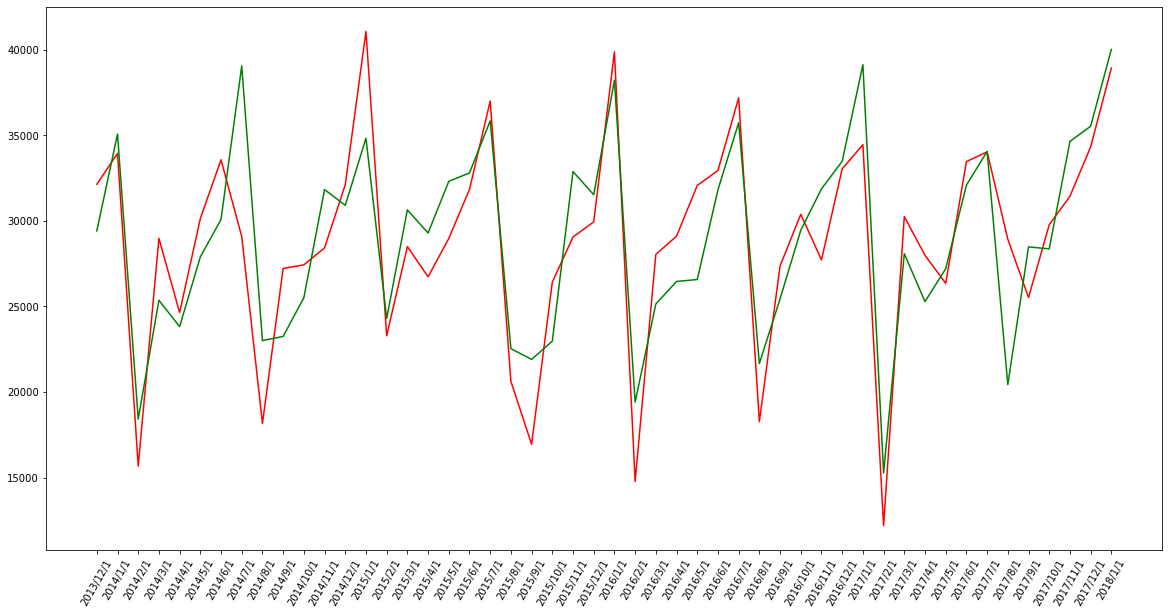

In [35]:
ans = result.predict(start = 20,end = 69)
plt.figure(figsize=(20,10))
plt.plot(data['time'][20:70],data['sum_by_month'][20:70],color = 'red')
plt.plot(data['time'][20:70],ans,color = 'green')
plt.xticks(rotation = 60)

In [36]:
ans = result.get_forecast(steps = 24, exog = data.loc[71:94,[
                                 'oil price standard last_month',
                                 'last_month',
                                 'gdp_growth standard last_month',
                                 '疫情',
                                 'income average last_month',
                                 'trafic index standard last_month']],
                          alpha = 0.01)

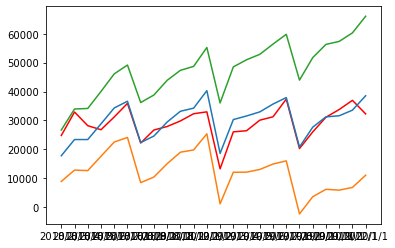

In [37]:
plt.plot(data['time'][70:94],data['sum_by_month'][70:94],color = 'red')
plt.plot(data['time'][70:94],ans.predicted_mean)
plt.plot(data['time'][70:94],ans.conf_int().iloc[:,0])
plt.plot(data['time'][70:94],ans.conf_int().iloc[:,1])

In [38]:
ans

In [39]:
#24781
data['sum_by_month'][70:94]

71    24781
72    32911
73    28173
74    26781
75    31191
76    35903
77    22189
78    26687
79    27896
80    29821
81    32309
82    32966
83    13255
84    26044
85    26433
86    30082
87    31259
88    37371
89    20265
90    26012
91    31106
92    33773
93    36947
94    32256
Name: sum_by_month, dtype: int64

In [40]:
ans = result.get_forecast(steps = 46, exog = data.loc[71:,[
                                 'oil price standard last_month',
                                 'last_month',
                                 'gdp_growth standard last_month',
                                 '疫情',
                                 'income average last_month',
                                 'trafic index standard last_month']],
                     alpha = 0.05)

(13000.0, 52000.0)

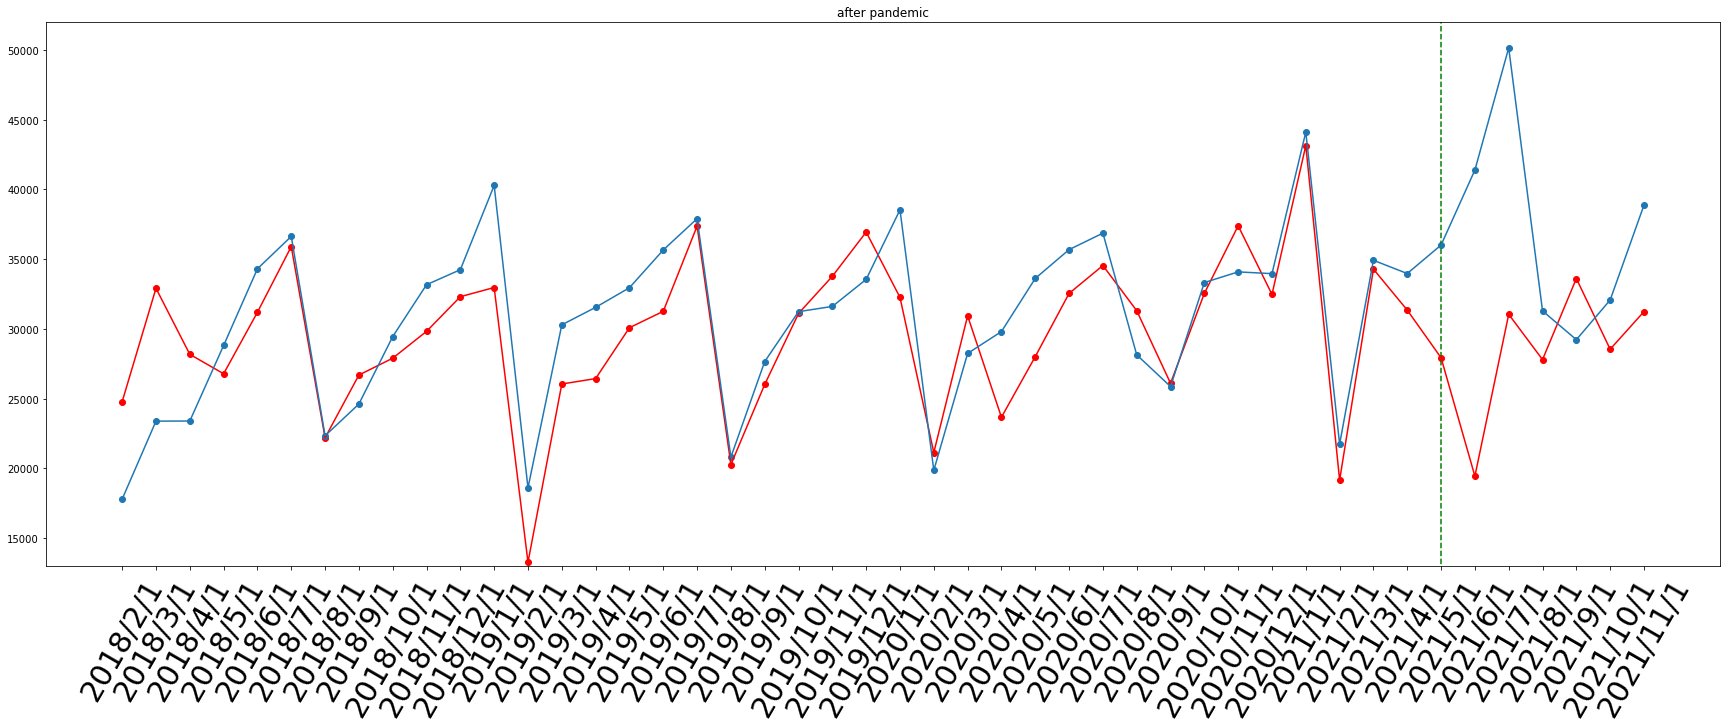

In [41]:
plt.figure(figsize=(30,10))
plt.plot(data['time'][70:],data['sum_by_month'][70:],color = 'red')
plt.scatter(data['time'][70:],data['sum_by_month'][70:],color = 'red')
plt.plot(data['time'][70:],ans.predicted_mean)
plt.scatter(data['time'][70:],ans.predicted_mean)
plt.title('after pandemic')
plt.xticks(rotation = 60,size = 30)
plt.vlines('2021/5/1',ymin = 0,ymax = 60000,color = 'green',linestyles = '--')
plt.ylim(13000,52000)

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

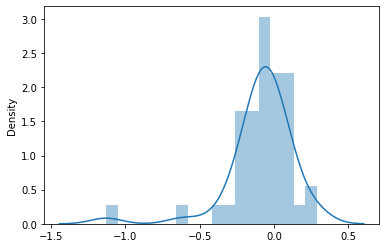

In [42]:
sns.distplot((data['sum_by_month'][70:] - ans.predicted_mean)/data['sum_by_month'][70:])

In [22]:
np.mean(np.abs(np.array((data['sum_by_month'][70:100] - ans.predicted_mean[:30]))/data['sum_by_month'][70:100]))

0.12324953562019589

In [23]:
np.mean(np.array((data['sum_by_month'][70:] - ans.predicted_mean)/data['sum_by_month'][70:]))

-0.08655655966367869

In [24]:
np.var(np.array((data['sum_by_month'][70:] - ans.predicted_mean)/data['sum_by_month'][70:]))

0.04949249553730754

In [43]:
ans = result.get_forecast(steps = 20, exog = data.loc[71:90,[
                                 'oil price standard last_month',
                                 'last_month',
                                 'gdp_growth standard last_month',
                                 '疫情last_month',
                                 'income average last_month',
                                 'trafic index standard last_month']],
                     alpha = 0.01)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

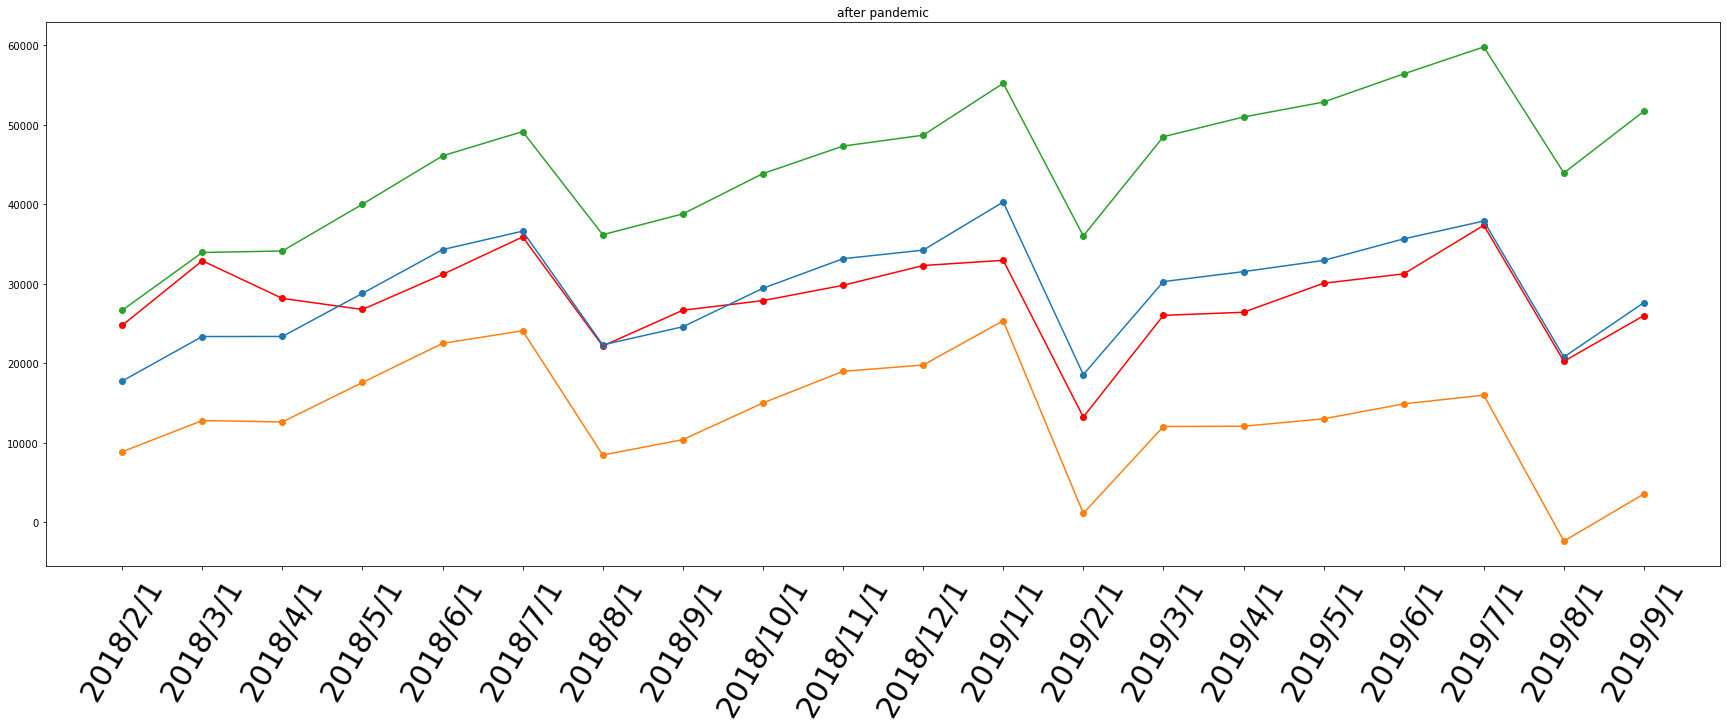

In [44]:
plt.figure(figsize=(30,10))
plt.plot(data['time'][70:90],data['sum_by_month'][70:90],color = 'red')
plt.scatter(data['time'][70:90],data['sum_by_month'][70:90],color = 'red')
plt.plot(data['time'][70:90],ans.predicted_mean)
plt.scatter(data['time'][70:90],ans.predicted_mean)
plt.plot(data['time'][70:90],ans.conf_int().iloc[:,0])
plt.scatter(data['time'][70:90],ans.conf_int().iloc[:,0])
plt.plot(data['time'][70:90],ans.conf_int().iloc[:,1])
plt.scatter(data['time'][70:90],ans.conf_int().iloc[:,1])
plt.title('after pandemic')
plt.xticks(rotation = 60,size = 30)

In [51]:
ans.predicted_mean

71    17783.161787
72    23381.106992
73    23388.110395
74    28811.174249
75    34311.962093
76    36633.220782
77    22331.758633
78    24608.279435
79    29446.997692
80    33167.580277
81    34244.756540
82    40294.651014
83    18591.429981
84    30289.518159
85    31543.507354
86    32950.842126
87    35660.021818
88    37905.324954
89    20801.159823
90    27654.475867
Name: predicted_mean, dtype: float64

In [55]:
(data['sum_by_month'][70:90] - ans.predicted_mean)/data['sum_by_month'][70:90]

71    0.282387
72    0.289566
73    0.169840
74   -0.075807
75   -0.100060
76   -0.020339
77   -0.006434
78    0.077893
79   -0.055599
80   -0.112222
81   -0.059914
82   -0.222309
83   -0.402598
84   -0.163013
85   -0.193338
86   -0.095367
87   -0.140792
88   -0.014298
89   -0.026457
90   -0.063143
dtype: float64

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

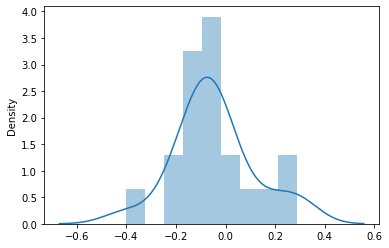

In [54]:
sns.distplot((data['sum_by_month'][70:90] - ans.predicted_mean)/data['sum_by_month'][70:90])

In [57]:
#模型 (0,1,1),(1,0,1),12   #best(5,1,1),(1,1,1,12) "n" # 5,1,1 6,1,4,12 'n'  # 5,1,1,6,1,4,6 'n'
s = SARIMAX(
            data['sum_by_month'][:].astype(int).values,
            order = (5,1,3),
            seasonal_order=(6,1,6,12),
            exog = data.loc[:,[
                                 'oil price standard last_month',
                                 'last_month',
                                 'gdp_growth standard last_month',
                                 '疫情',
                                 'income average last_month',
                                 'trafic index standard last_month']],
            trend = 'n',
            time_varying_regression=True,
            mle_regression=False,
            measurement_error = True
           )

In [58]:
result = s.fit()
result.summary()

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           28     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.61545D+00    |proj g|=  7.52335D-01


 This problem is unconstrained.



At iterate    5    f=  8.36697D+00    |proj g|=  4.56262D-02

At iterate   10    f=  8.33848D+00    |proj g|=  5.78628D-02

At iterate   15    f=  8.29415D+00    |proj g|=  8.75799D-02

At iterate   20    f=  8.28064D+00    |proj g|=  7.26030D-02

At iterate   25    f=  8.27597D+00    |proj g|=  1.92622D-02

At iterate   30    f=  8.27175D+00    |proj g|=  3.21192D-02

At iterate   35    f=  8.26937D+00    |proj g|=  1.14859D-02

At iterate   40    f=  8.26665D+00    |proj g|=  1.04882D-02

At iterate   45    f=  8.26639D+00    |proj g|=  3.17805D-02

At iterate   50    f=  8.26583D+00    |proj g|=  8.50678D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                              SARIMAX Results                                              
===========================================================================================================
Dep. Variable:                                                   y   No. Observations:                  116
Model:             SARIMAX(5, 1, 3)x(6, 1, [1, 2, 3, 4, 5, 6], 12)   Log Likelihood                -958.837
Date:                                             Wed, 20 Apr 2022   AIC                           1973.673
Time:                                                     15:34:44   BIC                           2045.765
Sample:                                                          0   HQIC                          2002.824
                                                             - 116                                         
Covariance Type:                                               opg                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
ar.L1                                    0.6876      1.069      0.644      0.520      -1.407       2.782
ar.L2                                   -0.4210      1.093     -0.385      0.700      -2.563       1.721
ar.L3                                    0.2785      0.756      0.368      0.713      -1.204       1.761
ar.L4                                   -0.3571      0.749     -0.476      0.634      -1.826       1.112
ar.L5                                    0.2833      0.465      0.610      0.542      -0.627       1.194
ma.L1                                   -0.8227      0.507     -1.622      0.105      -1.817       0.171
ma.L2                                    0.4283      1.153      0.371      0.710      -1.832       2.689
ma.L3                                   -0.0803      0.942     -0.085      0.932      -1.927       1.767
ar.S.L12                                -0.9082      0.519     -1.751      0.080      -1.925       0.109
ar.S.L24                                -0.6886      0.871     -0.791      0.429      -2.396       1.019
ar.S.L36                                -0.3963      1.162     -0.341      0.733      -2.675       1.882
ar.S.L48                                -0.3086      1.028     -0.300      0.764      -2.324       1.707
ar.S.L60                                -0.0801      0.989     -0.081      0.935      -2.018       1.858
ar.S.L72                                -0.0375      0.542     -0.069      0.945      -1.099       1.024
ma.S.L12                                 0.2453      0.472      0.519      0.604      -0.681       1.171
ma.S.L24                                 0.2708      0.397      0.683      0.495      -0.506       1.048
ma.S.L36                                 0.3303      0.513      0.644      0.519      -0.675       1.335
ma.S.L48                                 0.0743      0.625      0.119      0.905      -1.150       1.298
ma.S.L60                                 0.2049      0.820      0.250      0.803      -1.403       1.812
ma.S.L72                                 0.0438      0.879      0.050      0.960      -1.679       1.767
var.oil price standard last_month        1.0000   9.58e-06   1.04e+05      0.000       1.000       1.000
var.last_month                        1.087e-10      0.001   8.69e-08      1.000      -0.002       0.002
var.gdp_growth standard last_month       0.9999   4.65e-05   2.15e+04      0.000       1.000       1.000
var.疫情                                   1.8675      7.322      0.255      0.799     -12.483      16.218
var.income average last_month            1.0000   9.13e-06   1.09e+05      0.000       1.000       1.000
var.trafic index standard last_month    

In [59]:
data

,date,sum_by_month,income_average,舀除,Unnamed: 5,oil price,steel price,import,export,trafice_index,...,steel price standard,income average standard,trafic index standard,gdp_growth standard,dif,疫情last_month,income average last_month,gdp_growth standard last_month,oil price standard last_month,trafic index standard last_month
1,2012M04,23581,130318,14,90.93,119.04,24500,30225862,7773734,109.17,...,0.802280,-1.836515,1.541531,-1.148868,-3809.0,0.0,-1.668303,-1.122633,2.040468,0.954616
2,2012M05,23769,130318,15,91.01,101.75,24500,27769174,8115286,108.16,...,0.802280,-1.836515,1.259253,-1.148868,188.0,0.0,-1.836515,-1.148868,1.879700,1.879700
3,2012M06,24943,130318,15,91.00,96.13,24500,26508428,7578136,106.96,...,0.802280,-1.836515,0.923872,-1.148868,1174.0,0.0,-1.836515,-1.148868,1.203377,1.203377
4,2012M07,34893,136296,16,90.96,105.35,23000,30329134,7922212,107.33,...,0.229577,-1.509501,1.027281,-0.550710,9950.0,0.0,-1.836515,-1.148868,0.983543,0.983543
5,2012M08,23374,136296,15,90.97,114.47,23000,27271908,7485408,109.12,...,0.229577,-1.509501,1.527557,-0.550710,-11519.0,0.0,-1.509501,-0.550710,1.344196,1.344196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2021M07,31043,197066,38,131.26,77.71,28979,27159984,8576030,105.50,...,2.512370,1.814795,0.515826,0.598382,11609.0,6011.0,1.523393,2.377113,0.232508,0.232508
113,2021M08,27797,197066,39,132.68,73.62,28979,27475010,7928856,105.30,...,2.512370,1.814795,0.459930,0.598382,-3246.0,835.0,1.814795,0.598382,0.263019,0.263019
114,2021M09,33612,197066,38,134.10,77.80,28979,26461888,7506336,105.42,...,2.512370,1.814795,0.493468,0.598382,5815.0,313.0,1.814795,0.598382,0.103033,0.103033
115,2021M10,28539,214296,39,135.41,83.39,30479,26865068,8118102,106.26,...,3.085073,2.757327,0.728234,0.855484,-5073.0,233.0,1.814795,0.598382,0.266540,0.266540


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

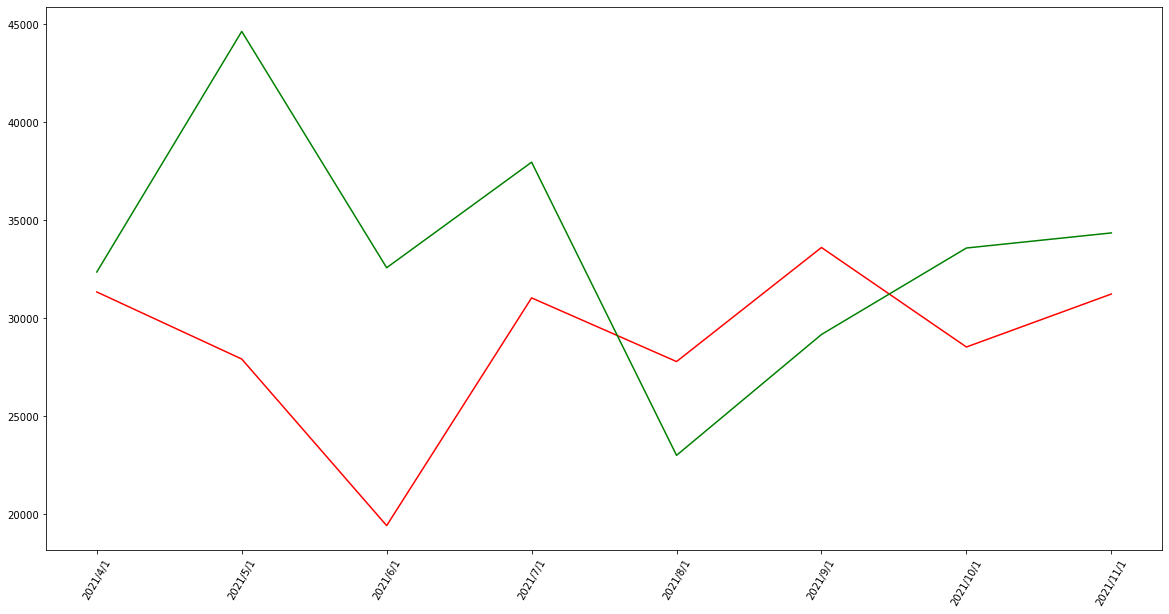

In [60]:
ans = result.predict(start = 108,end = 115)
plt.figure(figsize=(20,10))
plt.plot(data['time'][108:],data['sum_by_month'][108:],color = 'red')
plt.plot(data['time'][108:],ans,color = 'green')
plt.xticks(rotation = 60)

In [31]:
data['time']

1       2012/4/1
2       2012/5/1
3       2012/6/1
4       2012/7/1
5       2012/8/1
         ...    
112     2021/7/1
113     2021/8/1
114     2021/9/1
115    2021/10/1
116    2021/11/1
Name: time, Length: 116, dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb3c9925520>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb3c9925c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb3c9925190>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb41bf393a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb41bf39730>],
 'means': []}

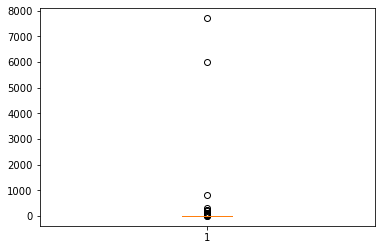

In [84]:
plt.boxplot(data['疫情last_month'])

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.,  8000.,  9000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

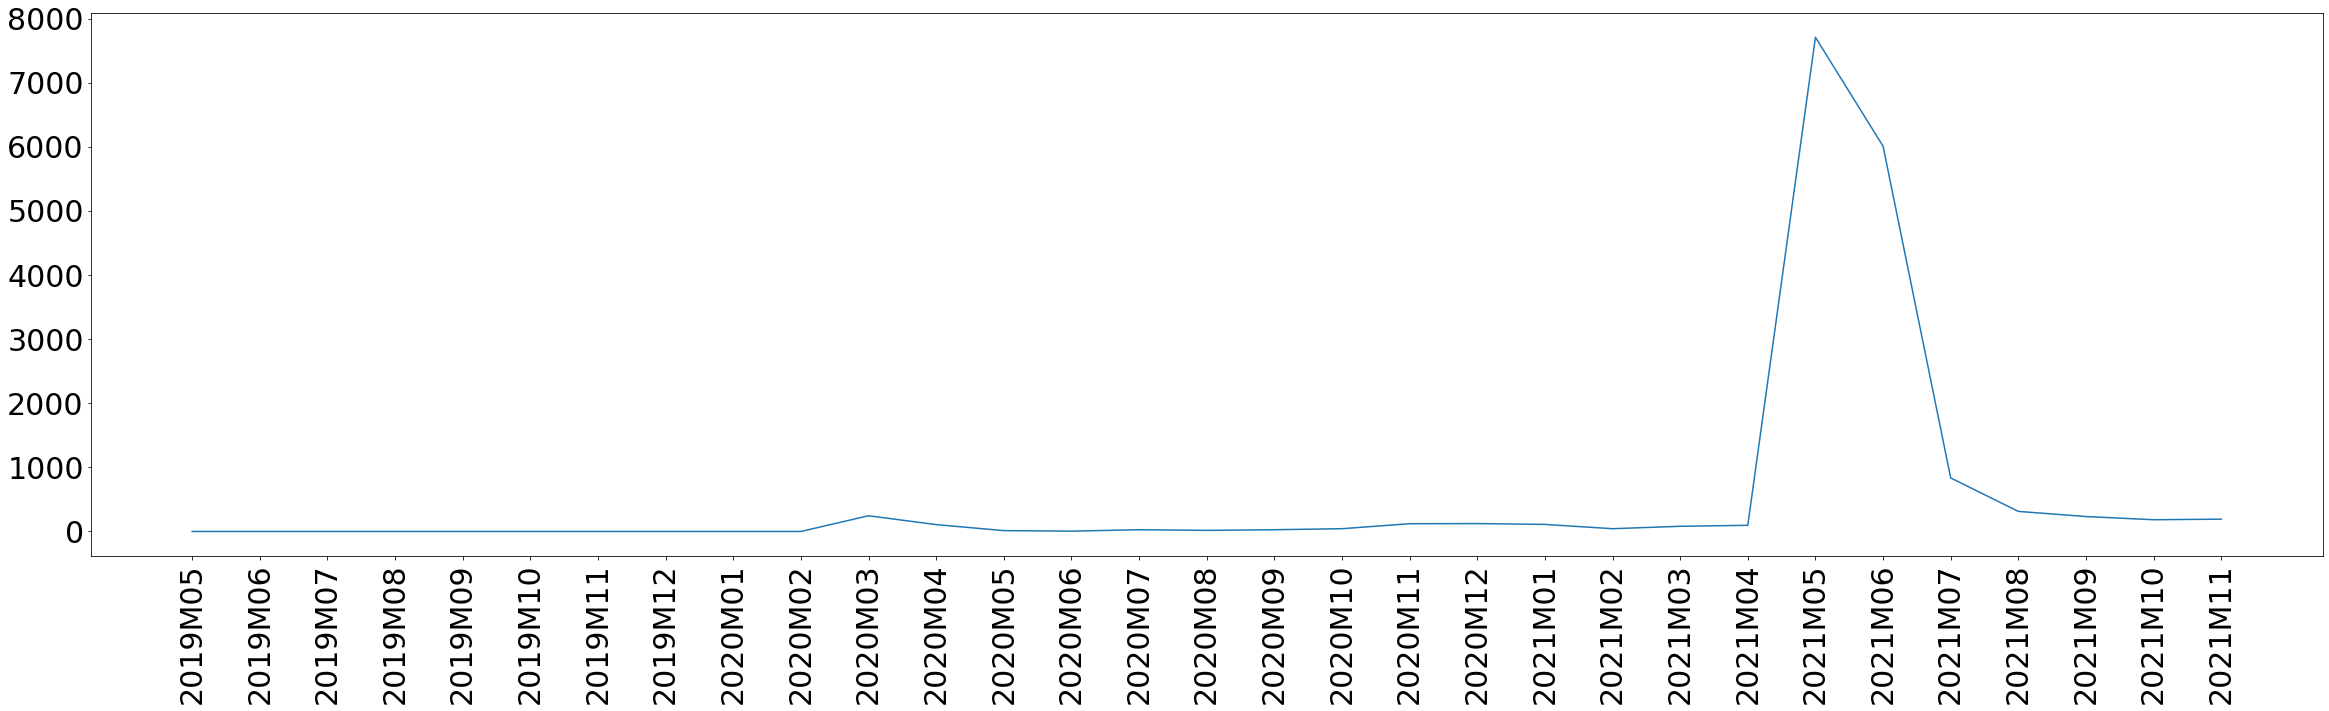

In [82]:
plt.figure(figsize=(40,10))
plt.plot(data['date'][85:],data['疫情'][85:])
plt.xticks(rotation = 90,size = 30)
plt.yticks(size = 30)